This is the file for Data Exploration

We will use this to visualize the data and decide which
features to use to predict housing prices.

Additionally, this will serve as the platform for cleaning
the training data and storing it for use in later notebooks.

In [1]:
import prices

In [2]:
dataTrainFull=prices.pd.read_csv('DATA/train.csv')
dataTrainFull[:10] # print first 10 entries to see what the data looks like

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
# Limit variables to the label we are training for and the continuous features
dataTrain = prices.pd.DataFrame(dataTrainFull[['LotArea','LotFrontage','PoolArea','SalePrice']])
dataTrainNum = dataTrain

# Replace NaN values with the mean of not-NaN values
indexNaN=prices.np.isnan(dataTrain['LotFrontage'])
replaceNaN=prices.np.array(dataTrain['LotFrontage'][-indexNaN].mean()).round()
columnNaN=dataTrain['LotFrontage'].values

columnNaN[indexNaN] = replaceNaN
dataTrainNum['LotFrontage']=columnNaN

del(indexNaN,replaceNaN,columnNaN)
dataTrainNum[:10]

,LotArea,LotFrontage,PoolArea,SalePrice
0,8450,65.0,0,208500
1,9600,80.0,0,181500
2,11250,68.0,0,223500
3,9550,60.0,0,140000
4,14260,84.0,0,250000
5,14115,85.0,0,143000
6,10084,75.0,0,307000
7,10382,70.0,0,200000
8,6120,51.0,0,129900
9,7420,50.0,0,118000


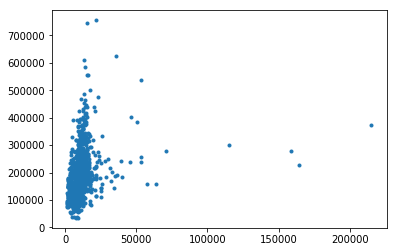

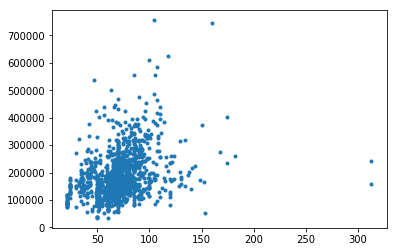

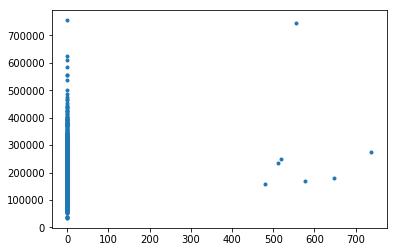

In [4]:
prices.plt.plot('LotArea','SalePrice','.',data=dataTrainNum)
prices.plt.show()
prices.plt.plot('LotFrontage','SalePrice','.',data=dataTrainNum)
prices.plt.show()
prices.plt.plot('PoolArea','SalePrice','.',data=dataTrainNum)
prices.plt.show()

As can be clearly seen, we need to do some cleaning of the data before it can be used.
There appear to be some severe outliers which we should discard if we hope to have
a reasonable model. As a rule of thumb, we will try discarding those cases that lie
more than 3 standard deviations away from the mean of any feature or label.

The only variables that look promising are LotArea and LotFrontage. 
LotArea quite clearly influences price, and clusters quite well in a linear region,
but LotFrontage is much less reliable. 

In [5]:
areaStd,frontStd,priceStd=prices.standardize(dataTrainNum['LotArea'].values,dataTrainNum['LotFrontage'].values,dataTrainNum['SalePrice'].values)
areaStd[0][:4],frontStd[0][:4],priceStd[0][:4]

(array([-0.20714171, -0.09188637,  0.07347998, -0.09689747]),
 array([-0.22896913,  0.45233847, -0.09270761, -0.45607166]),
 array([ 0.34727322,  0.00728832,  0.53615372, -0.51528106]))

In [14]:
dataTrainClean=dataTrainNum[['LotArea','LotFrontage','SalePrice']][(dataTrainNum['LotArea'].values<=20500)*(dataTrainNum['SalePrice'].values<=400000)]
dataTrainClean[:10]

,LotArea,LotFrontage,SalePrice
0,8450,65.0,208500
1,9600,80.0,181500
2,11250,68.0,223500
3,9550,60.0,140000
4,14260,84.0,250000
5,14115,85.0,143000
6,10084,75.0,307000
7,10382,70.0,200000
8,6120,51.0,129900
9,7420,50.0,118000


In [15]:
# Calculate percent loss of data due to cleaning
percentLoss=round(100*(1-len(dataTrainClean)/len(dataTrain)),2)
                       
print('We lost about '+str(percentLoss)+'% of the data due to cleaning,\n'
      +'our clean data thus represents about '+str(round(100-percentLoss,1))+'% of the given data.\n')
print('We have '+str(len(dataTrainClean))+' remaining examples for training')

We lost about 5.07% of the data due to cleaning,
our clean data thus represents about 94.9% of the given data.

We have 1386 remaining examples for training


In [16]:
# Write clean data to a file for fitting

dataTrainClean.to_pickle("Clean Training Data.txt")

In [13]:
prices.unstandardize(1,areaStd[1],areaStd[2])

20494.67418763989